In [ ]:
!pip install geopandas

In [2]:
import geopandas
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm (1).zip")
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


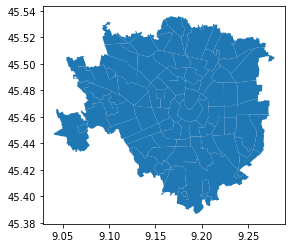

In [5]:
quartieri.plot()

In [ ]:
!pip install contextily

In [7]:
import contextily

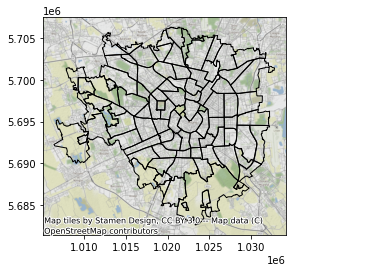

In [8]:
ax = quartieri.to_crs(epsg=3857).plot(figsize =(5,4), facecolor="none", edgecolor = "k")
contextily.add_basemap(ax)

In [9]:
from shapely.geometry import Point

In [10]:
Duomo = Point(9.191383, 45.464211)
mask = quartieri.contains(Duomo)
quartieri[mask]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


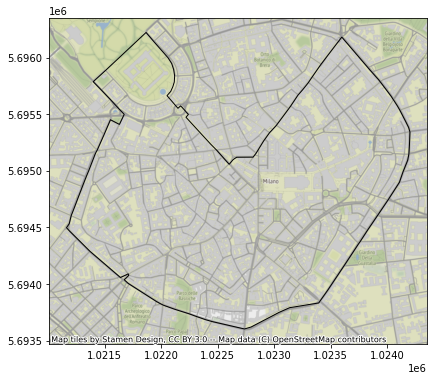

In [11]:
ax = quartieri[quartieri.contains(Duomo)].to_crs(epsg=3857).plot(figsize=(12,6), facecolor= "none", edgecolor = "k", markersize= 8)
contextily.add_basemap(ax)

visualizzare i quartieri vicini a quello che contiene il Duomo

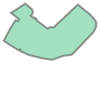

In [12]:
quartiere_duomo = quartieri[quartieri.contains(Duomo)].geometry.squeeze()
quartiere_duomo

In [13]:
quartieri_vicini = quartieri.touches(quartiere_duomo)
quartieri[quartieri_vicini]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
13,4,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102,"POLYGON ((9.20700 45.46787, 9.20712 45.46721, ..."
25,8,PARCO SEMPIONE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2966.984475,4.704203e+05,114,"POLYGON ((9.17958 45.47255, 9.17636 45.47043, ..."
34,6,PORTA TICINESE - CONCA DEL NAVIGLIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5293.159062,1.255017e+06,123,"POLYGON ((9.18740 45.45603, 9.18736 45.45584, ..."
60,5,PORTA VIGENTINA - PORTA LODOVICA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4710.382643,1.135196e+06,149,"POLYGON ((9.20186 45.45238, 9.20115 45.45196, ..."
79,7,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168,"POLYGON ((9.17538 45.46981, 9.17606 45.46932, ..."


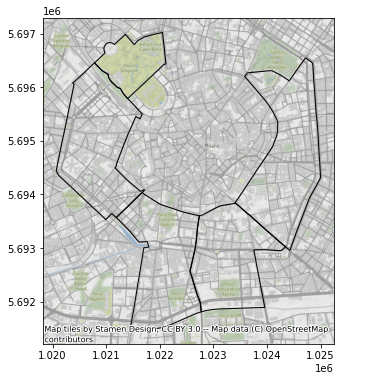

In [14]:
ax = quartieri[quartieri_vicini].to_crs(epsg=3857).plot(figsize=(12,6), facecolor= "none", edgecolor = "k")
contextily.add_basemap(ax)